# Importações de libs e extracao de dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extração do dataset

In [2]:
data = pd.read_csv('datatran2020.csv', encoding='ISO-8859-1', delimiter=';')

# Analise exploratória

In [3]:
#Explorando as 5 primeiras linhas
data.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,...,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR


In [4]:
#Checando o scheema.
# Identificado que a coluna BR deveria ser strings, já que menciona numeros das Rodovias BR.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63548 entries, 0 to 63547
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63548 non-null  float64
 1   data_inversa            63548 non-null  object 
 2   dia_semana              63548 non-null  object 
 3   horario                 63548 non-null  object 
 4   uf                      63548 non-null  object 
 5   br                      63390 non-null  float64
 6   km                      63390 non-null  object 
 7   municipio               63548 non-null  object 
 8   causa_acidente          63548 non-null  object 
 9   tipo_acidente           63548 non-null  object 
 10  classificacao_acidente  63548 non-null  object 
 11  fase_dia                63548 non-null  object 
 12  sentido_via             63548 non-null  object 
 13  condicao_metereologica  63548 non-null  object 
 14  tipo_pista              63548 non-null

In [5]:
#Convertido coluna br toda para inteiro e depois string.
data['br'] = data['br'].astype(str)

In [6]:
#Dados estatisticos de colunas numericas
data.describe()

,id,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,63548.000000,63548.000000,63548.000000,63548.000000,63548.000000,63548.000000,63548.000000,63548.000000,63548.000000
mean,296567.776972,2.323881,0.083260,0.855668,0.269151,0.957670,0.158132,1.124819,1.634151
std,21063.404634,1.709789,0.339825,1.009095,0.600020,1.342541,0.436503,1.113988,0.724907
min,260031.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,278493.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,296586.500000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,314604.250000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,364903.000000,73.000000,13.000000,42.000000,19.000000,73.000000,11.000000,44.000000,23.000000


# 5 Rodovias com mais acidentes

In [7]:
#Extracao das 5 rodovias com mais acidentes
data['br'].value_counts().head(5)

br
101.0    10535
116.0     9156
381.0     3031
40.0      3021
153.0     2547
Name: count, dtype: int64

In [8]:
rodovias_selecionadas = ['101.0', '116.0', '40.0', '381.0', '153.0']
data_top_brs = data[data['br'].isin(rodovias_selecionadas)]
data_top_brs.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR
6,260041.0,2020-01-01,quarta-feira,02:20:00,SC,101.0,"89,9",BARRA VELHA,Falta de Atenção à Condução,Colisão com objeto estático,...,0,1,0,0,1,"-26,66327987","-48,68898153",SR-SC,DEL8/3,UOP02/SC


In [9]:
#Agrupado pelas 5 brs com mais acidente e por tipo de acidente.
top5_brs_counts = data_top_brs.groupby(['br']).size().reset_index(name='contagem').sort_values('contagem', ascending=False)
print(top5_brs_counts)

      br  contagem
0  101.0     10535
1  116.0      9156
3  381.0      3031
4   40.0      3021
2  153.0      2547


Text(0.5, 0, 'Rodovias (Brs)')

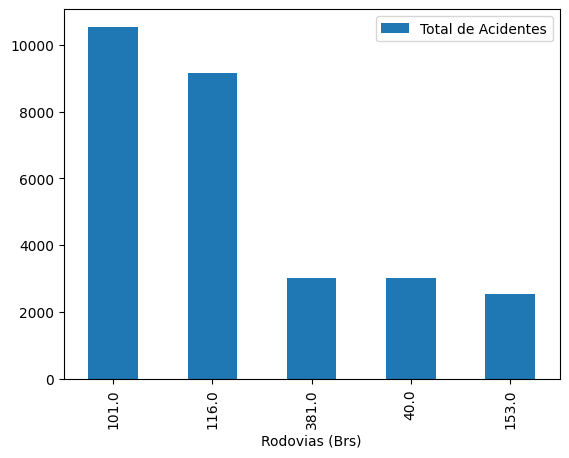

In [10]:
top5_brs_counts.plot.bar(x='br', y='contagem', label='Total de Acidentes')
plt.xlabel('Rodovias (Brs)')

# Acidentes por mês

In [11]:
#Convertendo a coluna para datetime.
data['data_inversa'] = pd.to_datetime(data['data_inversa'], format='%Y-%m-%d')

In [12]:
#Conferindo se houve a conversão
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63548 entries, 0 to 63547
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      63548 non-null  float64       
 1   data_inversa            63548 non-null  datetime64[ns]
 2   dia_semana              63548 non-null  object        
 3   horario                 63548 non-null  object        
 4   uf                      63548 non-null  object        
 5   br                      63548 non-null  object        
 6   km                      63390 non-null  object        
 7   municipio               63548 non-null  object        
 8   causa_acidente          63548 non-null  object        
 9   tipo_acidente           63548 non-null  object        
 10  classificacao_acidente  63548 non-null  object        
 11  fase_dia                63548 non-null  object        
 12  sentido_via             63548 non-null  object

In [13]:
#Criando a coluna mês com base na coluna data inversa
data['mes'] = data['data_inversa'].dt.to_period('M')

In [16]:
#separando os dados para o grafico de linha
mes_count_acidente = data.groupby(['mes']).size().reset_index(name='contagem')
print(mes_count_acidente)

        mes  contagem
0   2020-01      5497
1   2020-02      5467
2   2020-03      4790
3   2020-04      3883
4   2020-05      4657
5   2020-06      4734
6   2020-07      5127
7   2020-08      5643
8   2020-09      5689
9   2020-10      6120
10  2020-11      5745
11  2020-12      6196


<Axes: xlabel='mes'>

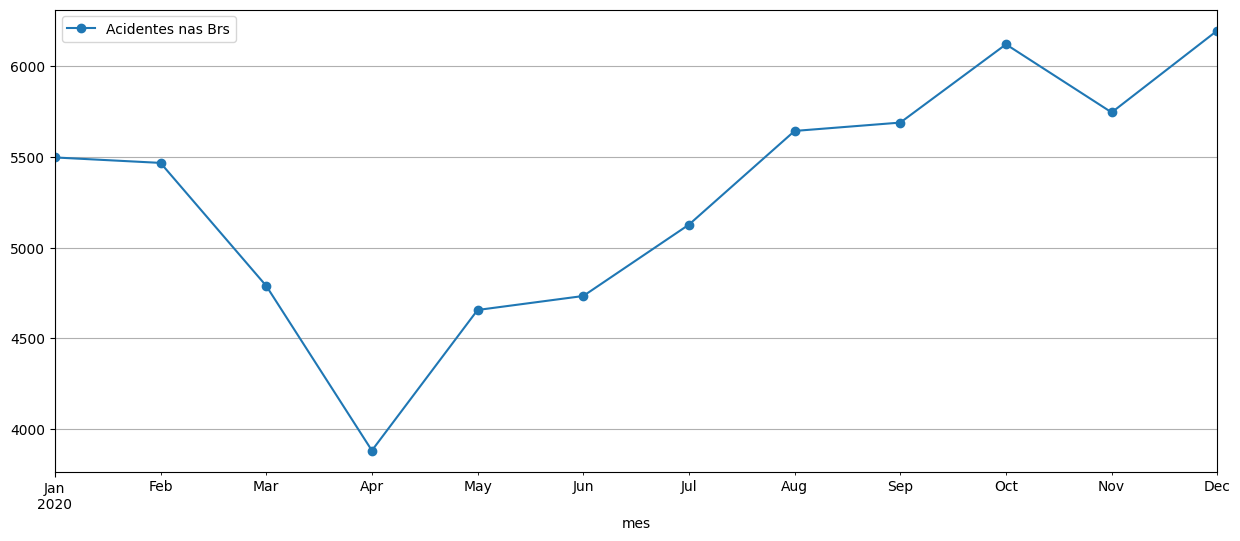

In [27]:
mes_count_acidente.plot(kind='line', x='mes', y='contagem', figsize=(15, 6), marker='o', grid=True, label='Acidentes nas Brs')


# Mapa de calor de acidentes nos Estados

In [34]:
acidentes_estado = data.groupby('uf').size().reset_index(name='acidentes')
print(acidentes_estado)

    uf  acidentes
0   AC        300
1   AL        628
2   AM        138
3   AP        155
4   BA       3456
5   CE       1571
6   DF       1040
7   ES       2534
8   GO       3228
9   MA       1154
10  MG       8374
11  MS       1540
12  MT       2195
13  PA        963
14  PB       1401
15  PE       2560
16  PI       1203
17  PR       7190
18  RJ       4236
19  RN       1337
20  RO       1486
21  RR        250
22  RS       4176
23  SC       7220
24  SE        575
25  SP       4043
26  TO        595


Text(0.5, 1.0, 'Acidentes por estados')

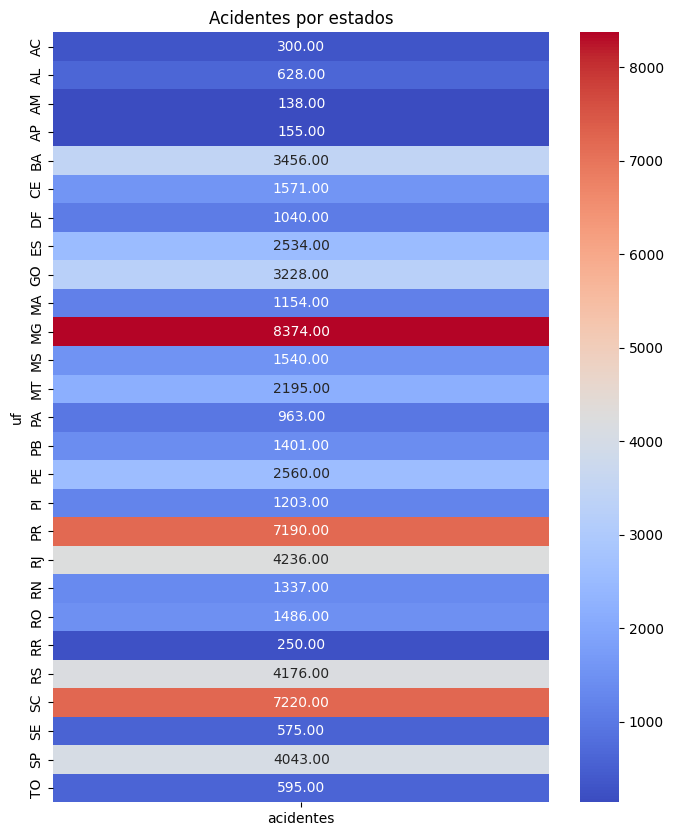

In [49]:
pivot_acidentes_estado = acidentes_estado.pivot_table(values='acidentes', index='uf')
plt.figure(figsize=(8, 10))
heatmap_estados = sns.heatmap(pivot_acidentes_estado, annot=True, fmt='.2f', cmap='coolwarm')
heatmap_estados.set_title('Acidentes por estados')